# NLP - Hotel review sentiment analysis in python

AUTHOR-EKANSH TRIVEDI

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Facts and Import 

In [ ]:
import pandas as pd 
# Local directory
Reviewdata = pd.read_csv('/content/drive/MyDrive/train.csv')
#Data Credit - https://www.kaggle.com/anu0012/hotel-review/data

In [ ]:
Reviewdata.shape

(38932, 5)

In [ ]:
Reviewdata.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [ ]:
Reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [ ]:
Reviewdata.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id13094,1
Description,38932,38932,My wife and went down for just one night but w...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


## Data Cleaning / EDA

In [ ]:
### Checking Missing values in the Data Set and printing the Percentage for Missing Values for Each Columns ###

count = Reviewdata.isnull().sum().sort_values(ascending=False)
percentage = ((Reviewdata.isnull().sum()/len(Reviewdata)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
Is_Response,0,0.0
Device_Used,0,0.0
Browser_Used,0,0.0
Description,0,0.0
User_ID,0,0.0


Percentage for default

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


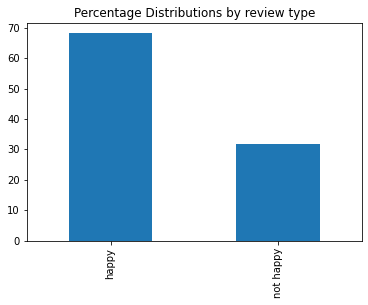

In [ ]:
### Checking for the Distribution of Default ###
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(Reviewdata.Is_Response.value_counts(normalize=True)*100,2))
round(Reviewdata.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [ ]:
#Removing columns
Reviewdata.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'], inplace = True)

In [ ]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [ ]:

# Let's take a look at the updated text
Reviewdata['cleaned_description'] = pd.DataFrame(Reviewdata.Description.apply(cleaned1))
Reviewdata.head(10)

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


In [ ]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [ ]:
# Let's take a look at the updated text
Reviewdata['cleaned_description_new'] = pd.DataFrame(Reviewdata['cleaned_description'].apply(cleaned2))
Reviewdata.head(10)

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,wonderful staff great location but it was defi...


In [ ]:
Reviewdata.to_csv("cleaned.csv")

## Model training 

In [ ]:
from sklearn.model_selection import train_test_split

Independent_var = Reviewdata.cleaned_description_new
Dependent_var = Reviewdata.Is_Response

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))


IV_train : 35038
IV_test  : 3894
DV_train : 35038
DV_test  : 3894


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [ ]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[2418,  305],
       [ 153, 1018]])

## Model prediciton 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.8823831535695943
Precision :  0.8890590818181386
Recall :  0.8823831535695943


## Trying on new reviews 

In [ ]:
example = ["the hotel was very good"]
result = model.predict(example)

print(result)

['happy']


In [ ]:
from sklearn.externals import joblib
joblib.dump(tvec, 'tfidf_model.pkl')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['tfidf_model.pkl']

In [ ]:
from sklearn.externals import joblib
joblib.dump(model, 'lr_model.pkl')

['lr_model.pkl']

#APP BUILDING:

In [ ]:
!pip install streamlit

     |████████████████████████████████| 8.2MB 6.1MB/s 
     |████████████████████████████████| 81kB 9.7MB/s 
     |████████████████████████████████| 163kB 52.1MB/s 
     |████████████████████████████████| 112kB 53.9MB/s 
     |████████████████████████████████| 4.6MB 48.4MB/s 
     |████████████████████████████████| 71kB 10.1MB/s 
     |████████████████████████████████| 122kB 47.8MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=47c82fa7fd537cb17b0718737ac291048eb6f9614516112662bdb93f1f746ace
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.3 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


In [ ]:
!pip install pyngrok==4.1.1

  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp37-none-any.whl size=15971 sha256=0f3ce086443b3fb7a7ada9d43b8f507bd13a0d66c99aedbde9eafb52a486663f
  Stored in directory: /root/.cache/pip/wheels/97/71/0d/1695f7c8815c0beb3b5d9b35d6eec9243c87e6070fbe3977fa
Successfully built pyngrok


In [ ]:
!pip install swachhdata -q

     |████████████████████████████████| 133kB 10.2MB/s 
     |████████████████████████████████| 102kB 7.3MB/s 
     |████████████████████████████████| 327kB 15.2MB/s 
     |████████████████████████████████| 266kB 23.7MB/s 


In [ ]:
from pyngrok import ngrok

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.externals import joblib
from tensorflow.keras.preprocessing.sequence import pad_sequences
from swachhdata.text import *
tokenizer =Tokenizer()
lr_model = open('lr_model.pkl','rb')
model = joblib.load(lr_model)
df=pd.read_csv("/content/cleaned.csv")
sentiment = ['happy','not happy']
PAGE_CONFIG = {"page_title":"Hotel review analysis","page_icon":":smiley:","layout":"centered"}
st.set_page_config(**PAGE_CONFIG)

def process(cleaned_description_new):
    return TextRecast(cleaned_description_new, urlRecast = {'process': 'remove'},
                      htmlRecast = True,
                      EscapeSequenceRecast = True,
                      MentionRecast = {'process': 'extract_remove'},
                      ContractionsRecast = True,
                      CaseRecast = {'process': 'lower'},
                      EmojiRecast = {'process': 'remove', 'space_out': False},
                      HashtagRecast = {'process': 'remove'},
                      StopWordsRecast = {'package': 'nltk', 'stopwords': None},
                      NumberRecast = {'process': 'remove', 'seperator': None},
                      PunctuationRecast = True,
                      LemmatizationRecast = {'package':'nltk'})

def main():
  menu = ["Tool"]
  tokenizer =Tokenizer()
  choice = st.sidebar.selectbox('Menu',menu)
  if choice == 'Tool':
    st.header("Hotel Review Analysis")
    st.write("A machine learning tool which will tell you if the customer is happy or not , with respect to his/her hotel experience")
    #opt=st.selectbox('Select input format',['Text'])
    #if opt == 'Text':
    user_input = st.text_input('Enter text')
    
    if st.button('Generate Text'):
      input=[user_input]
      generated_text= model.predict(input)[0]
      st.write(generated_text)

if __name__ == '__main__':
	main()

Writing app.py


In [ ]:
!streamlit run app.py &>/dev/null&

In [ ]:
# Setup a tunnel to the streamlit port 8501
url = ngrok.connect(port = 8501)
url

'http://e07909e39cbb.ngrok.io'

In [ ]:
!pgrep streamlit

348


In [ ]:
pip install pipreqs

In [ ]:
import pipreqs